In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np 
import datetime
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , RobustScaler, MaxAbsScaler,MinMaxScaler,OneHotEncoder, LabelEncoder
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold,RepeatedStratifiedKFold,StratifiedKFold,train_test_split,GridSearchCV,cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import sklearn
sns.set(font_scale = 1.5, style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')
sklearn.set_config(display = 'diagram')
np.random.seed(seed = 42)

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')

# DATA IMPORTING

In [3]:
turbo_2023avq = pd.read_csv('turbo_2023 avgust.csv')
turbo_2023avq.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yeniləndi,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,rəsmi diler,16.08.2023,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,1,64600,bakı,toyota,camry,2020,sedan,qara,0,avtomat,ön,bəli,NaN,28.07.2023,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox


In [4]:
turbo_2023sen=pd.read_csv('turbo_2023 sentyabr.csv')
turbo_2023sen.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,yox,7200,bakı,daewoo,lanos,2009,sedan,boz,260000,mexaniki,ön,xeyr,NaN,1.5,86,benzin,NaN,NaN,var,yox,yox,yox,var,yox,var,yox,yox,yox,yox,var,yox
1,yox,12600,xudat,ford,transit,1998,furqon,qırmızı,250000,mexaniki,arxa,xeyr,NaN,2.5,76,dizel,NaN,NaN,yox,var,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox


In [5]:
turbo_2023okt=pd.read_csv('turbo_2023 oktyabr.csv')
turbo_2023okt.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,45050,bakı,ford,mustang,2018,kupe,boz,56200,avtomat,arxa,xeyr,13.10.2023,NaN,2.3,309,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,yox,var,var,yox,var
1,1,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,26.09.2023,rəsmi diler,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox


In [6]:
turbo_2023may=pd.read_csv('turbo_2023may.csv')
turbo_2023may.head(2)

,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,3000,bakı,lada (vaz),2106,1990,sedan,qəhvəyi,120000,mexaniki,arxa,xeyr,28.05.2023,rusiya,1.6,75,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,208250,bakı,land rover,defender,2021,offroader / suv,qara,15000,avtomat,tam,xeyr,28.05.2023,NaN,3.0,400,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var


In [7]:
turbo_2022sent=pd.read_csv('turbo_2022sent.csv')
turbo_2022sent.head(2)

,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,yürüş,sürətlər_qutusu,ötürücü,yeni,qiymet,yeniləndi,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,hansı_bazar_üçün_yığılıb,vuruğu_var,rənglənib
0,bakı,lada (vaz),2107,1998,sedan,ağ,1.6,75,benzin,200000,mexaniki,ön,xeyr,3700,2022-10-22,var,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,NaN,NaN,NaN
1,bakı,bmw,530,2018,sedan,ağ,2.0,245,benzin,45000,avtomat,arxa,xeyr,91630,2022-10-25,var,yox,yox,var,var,var,var,var,var,var,var,var,yox,NaN,NaN,NaN


In [8]:
turbo_soldout=pd.read_csv('soldout.csv')
turbo_soldout.head(2)

,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,kredit,yeniləndi,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,9500.0,sumqayıt,volkswagen,passat,2007,sedan,ağ,336500,avtomat,ön,2.0,200,benzin,xeyr,27.09.2023,vuruğu yoxdur,rənglənməyib,var,var,var,yox,var,yox,var,var,var,yox,NaN,NaN,NaN
1,25500.0,bakı,hyundai,tucson,2012,offroader / suv,ağ,187000,avtomat,ön,2.0,184,dizel,xeyr,23.08.2023,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,var,var,var,var,yox,NaN,NaN,NaN


In [9]:
merged_turbo_data=pd.concat([turbo_2023avq,turbo_2023may,turbo_2022sent,turbo_soldout,turbo_2023sen,turbo_2023okt])
merged_turbo_data.head()

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yeniləndi,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,kredit
0,1,98260.0,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,rəsmi diler,16.08.2023,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,NaN
1,1,64600.0,bakı,toyota,camry,2020,sedan,qara,0,avtomat,ön,bəli,NaN,28.07.2023,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox,NaN
2,1,12800.0,sumqayıt,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,xeyr,NaN,20.08.2023,1.5,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox,NaN
3,0,44200.0,bakı,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,xeyr,NaN,20.08.2023,3.6,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,NaN
4,0,45050.0,bakı,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,xeyr,NaN,19.08.2023,4.7,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var,NaN


In [10]:
merged_turbo_data=merged_turbo_data.loc[merged_turbo_data['qiymet']>1000]
merged_turbo_data.head()

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yeniləndi,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,kredit
0,1,98260.0,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,rəsmi diler,16.08.2023,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,NaN
1,1,64600.0,bakı,toyota,camry,2020,sedan,qara,0,avtomat,ön,bəli,NaN,28.07.2023,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox,NaN
2,1,12800.0,sumqayıt,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,xeyr,NaN,20.08.2023,1.5,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox,NaN
3,0,44200.0,bakı,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,xeyr,NaN,20.08.2023,3.6,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,NaN
4,0,45050.0,bakı,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,xeyr,NaN,19.08.2023,4.7,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var,NaN


In [11]:
yeniləndi=pd.to_datetime(merged_turbo_data['yeniləndi'])

In [12]:
merged_turbo_data = merged_turbo_data.drop(columns = ['şəhər','avtosalon','kredit','yeni','yeniləndi'])

In [13]:
yeniləndi

0      2023-08-16
1      2023-07-28
2      2023-08-20
3      2023-08-20
4      2023-08-19
          ...    
5916   2023-10-13
5917   2023-10-13
5918   2023-12-10
5919   2023-10-13
5920   2023-10-13
Name: yeniləndi, Length: 31532, dtype: datetime64[ns]

In [14]:
merged_turbo_data =merged_turbo_data.drop_duplicates()
merged_turbo_data 

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,98260.0,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,rəsmi diler,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,64600.0,toyota,camry,2020,sedan,qara,0,avtomat,ön,NaN,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox
2,12800.0,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,NaN,1.5,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox
3,44200.0,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,NaN,3.6,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
4,45050.0,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,NaN,4.7,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,23800.0,ford,fusion,2017,sedan,yaş asfalt,150000,avtomat,ön,amerika,1.5,181,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var
5917,37700.0,kia,carnival,2016,minivan,qara,187000,avtomat,ön,NaN,2.2,202,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,var,var
5918,16000.0,mercedes,e 240,2003,sedan,qara,300000,avtomat,arxa,avropa,2.6,177,benzin,vuruğu yoxdur,rənglənib,var,var,var,var,var,var,var,yox,var,var,yox,var,yox
5919,25900.0,hyundai,santa fe,2009,offroader / suv,ağ,195000,avtomat,ön,NaN,2.0,184,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,yox,var,var


In [15]:
merged_turbo_data.mühərrik_hecmi = merged_turbo_data.mühərrik_hecmi.apply(lambda x: x*1000)
merged_turbo_data.head()

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,98260.0,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,rəsmi diler,2000.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,64600.0,toyota,camry,2020,sedan,qara,0,avtomat,ön,NaN,2500.0,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox
2,12800.0,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,NaN,1500.0,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox
3,44200.0,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,NaN,3600.0,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
4,45050.0,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,NaN,4700.0,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var


In [17]:
for col in merged_turbo_data.select_dtypes(include='object'):
    merged_turbo_data[col] = merged_turbo_data[col].str.strip()  
merged_turbo_data

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,98260.0,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,rəsmi diler,2000.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,64600.0,toyota,camry,2020,sedan,qara,0,avtomat,ön,NaN,2500.0,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox
2,12800.0,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,NaN,1500.0,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox
3,44200.0,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,NaN,3600.0,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
4,45050.0,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,NaN,4700.0,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,23800.0,ford,fusion,2017,sedan,yaş asfalt,150000,avtomat,ön,amerika,1500.0,181,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var
5917,37700.0,kia,carnival,2016,minivan,qara,187000,avtomat,ön,NaN,2200.0,202,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,var,var
5918,16000.0,mercedes,e 240,2003,sedan,qara,300000,avtomat,arxa,avropa,2600.0,177,benzin,vuruğu yoxdur,rənglənib,var,var,var,var,var,var,var,yox,var,var,yox,var,yox
5919,25900.0,hyundai,santa fe,2009,offroader / suv,ağ,195000,avtomat,ön,NaN,2000.0,184,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,yox,var,var


## NOW FIRSTLY SOLVE MOTOSIKLET NA PROBLEM FOR THE ALL DATA

In [18]:
moto_nan_list=merged_turbo_data[merged_turbo_data['ban_növü']=='motosiklet'].iloc[:,18:31].drop(columns=['dəri_salon','yağış_sensoru','kondisioner','oturacaqların_ventilyasiyası']).columns.tolist()

In [19]:
def motosikle_change_nan(data_frame=None):
    for i in moto_nan_list:
        data_frame[i].fillna('yox' , inplace=True)
    return data_frame
merged_turbo_data=motosikle_change_nan(data_frame=merged_turbo_data)
merged_turbo_data.head()

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,98260.0,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,rəsmi diler,2000.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,64600.0,toyota,camry,2020,sedan,qara,0,avtomat,ön,NaN,2500.0,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox
2,12800.0,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,NaN,1500.0,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox
3,44200.0,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,NaN,3600.0,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
4,45050.0,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,NaN,4700.0,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var


In [20]:
merged_turbo_data.describe()

,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
count,29121.000000,29121.000000,2.912100e+04,29121.000000,29121.000000
mean,38016.189966,2010.906150,1.724925e+05,2254.455548,184.801071
std,48168.351276,8.222353,1.624411e+05,1237.648307,95.971224
min,1100.000000,1939.000000,0.000000e+00,0.000000,3.000000
25%,13200.000000,2007.000000,7.600000e+04,1600.000000,116.000000
50%,23900.000000,2012.000000,1.605400e+05,2000.000000,170.000000
75%,43000.000000,2016.000000,2.350000e+05,2500.000000,225.000000
max,659600.000000,2023.000000,7.850000e+06,16000.000000,1707.000000


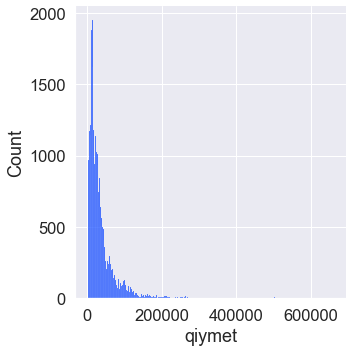

In [21]:
sns.displot(data=merged_turbo_data['qiymet'])
plt.show()

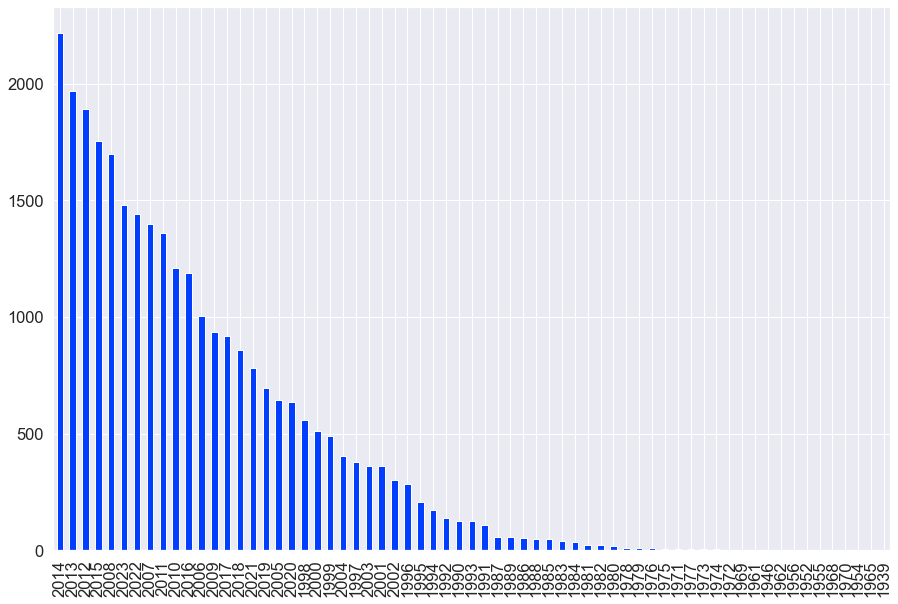

In [22]:
#en yeni masinin 10 yasi var
plt.figure(figsize=(15,10))
merged_turbo_data['buraxılış_ili'].value_counts().plot.bar()
plt.show()

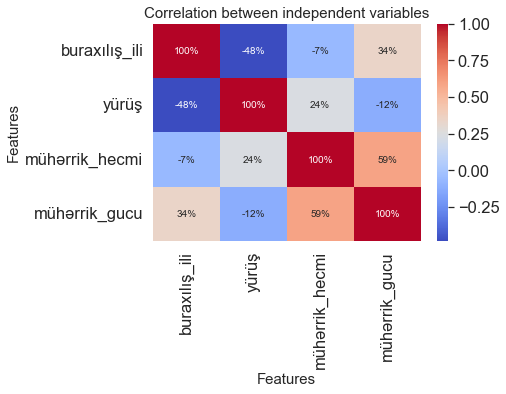

In [23]:
plt.figure(figsize = (6,4))
sns.heatmap(data = merged_turbo_data.drop(columns = 'qiymet').corr(), cmap = plt.cm.coolwarm, annot = True, fmt = '.0%')
plt.title(label = 'Correlation between independent variables', fontsize = 15)
plt.xlabel(xlabel = 'Features', fontsize = 15)
plt.ylabel(ylabel = 'Features', fontsize = 15)
plt.yticks(rotation = 0)
plt.show()

<AxesSubplot:>

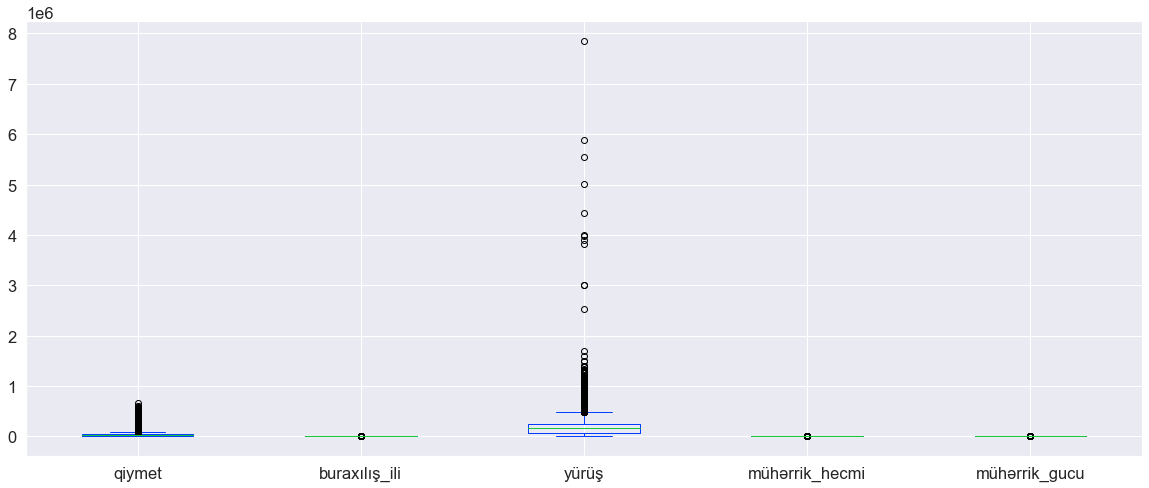

In [24]:
merged_turbo_data.select_dtypes(include='number').plot(kind='box' , vert=True , figsize=(20,8))

# SEPERATE ALL DATA NUMERIC AND CATEGORIC DATA THEN SOLVE NA PROBLEMS

In [25]:
def apply_imputer_categoric(data_frame=None):
    categoric_data = data_frame.select_dtypes(include='object')
    for i in categoric_data.columns:
        categoric_data[i] = SimpleImputer(strategy='most_frequent').fit_transform(categoric_data[i].to_frame())
    return categoric_data
categoric_data = apply_imputer_categoric(data_frame=merged_turbo_data)
categoric_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,jaguar,xf,sedan,qara,avtomat,arxa,rəsmi diler,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,toyota,camry,sedan,qara,avtomat,ön,avropa,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,var,var,var,yox,yox
2,baic,a1,sedan,yaş asfalt,avtomat,ön,avropa,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox
3,porsche,panamera 4,liftbek,göy,avtomat,tam,avropa,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
4,mercedes,s 500,sedan,qara,avtomat,tam,avropa,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var


In [26]:
def apply_imputer_numeric(data_frame=None):
    numeric_data = data_frame.select_dtypes(include='number')
    for i in numeric_data.columns:
        numeric_data[i] = SimpleImputer(strategy='median').fit_transform(numeric_data[i].to_frame())
    return numeric_data
numeric_data = apply_imputer_numeric(data_frame=merged_turbo_data)
numeric_data.head()

,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,98260.0,2019.0,0.0,2000.0,250.0
1,64600.0,2020.0,0.0,2500.0,181.0
2,12800.0,2014.0,103000.0,1500.0,115.0
3,44200.0,2013.0,160000.0,3600.0,300.0
4,45050.0,2012.0,104000.0,4700.0,435.0


# SOLVE OUTLIER PROBLEM FOR NUMERIC DATA

In [27]:
def found_outliers (data_frame=None):
    numeric_feature=data_frame.select_dtypes(include= 'number').drop(columns=['qiymet','buraxılış_ili']).columns.tolist()
    selected_feature=[]
    
    for i in numeric_feature:
        z_score = np.where(np.abs(stats.zscore(data_frame[i], nan_policy='omit')) >= 3, 1, 0)
        
        if 1 in z_score:
            selected_feature.append(i)
        else:
            pass
    return selected_feature

In [28]:
from scipy import stats
features=found_outliers(numeric_data)
features

['yürüş', 'mühərrik_hecmi', 'mühərrik_gucu']

In [29]:
def clean_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    # IQR hesapla
    IQR = Q3 - Q1
    # Alt ve üst sınırları hesapla
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Aykırı değerleri alt ve üst sınırlara eşitle
    data[column_name] = data[column_name].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    return data

In [30]:
numeric_data=clean_outliers(data=numeric_data,column_name='yürüş')

In [31]:
numeric_data=clean_outliers(data=numeric_data,column_name='mühərrik_hecmi')

In [32]:
numeric_data=clean_outliers(data=numeric_data,column_name='mühərrik_gucu')

<AxesSubplot:>

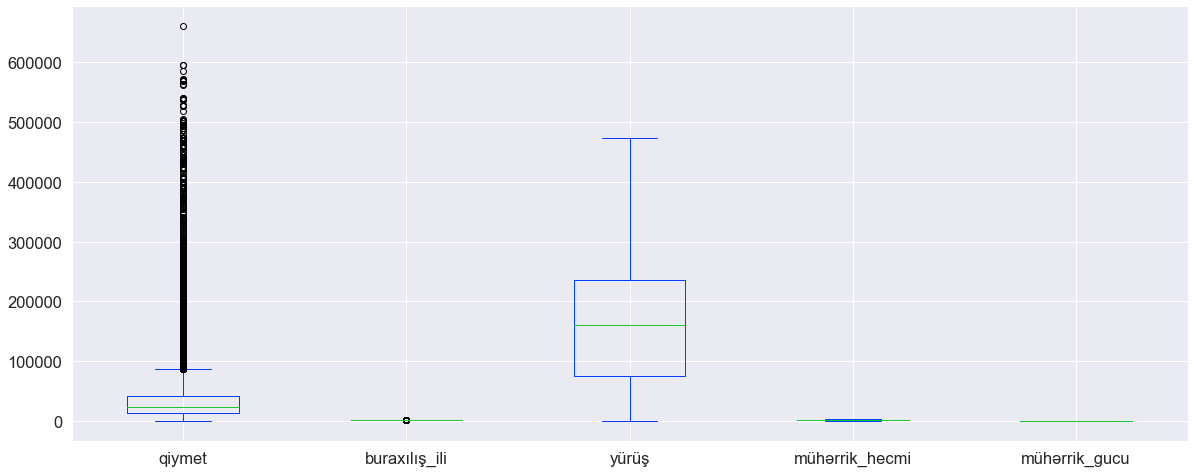

In [33]:
numeric_data.plot(kind='box' , vert=True , figsize=(20,8))

In [34]:
merged_data=pd.concat([categoric_data,numeric_data] , axis=1)
merged_data

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,jaguar,xf,sedan,qara,avtomat,arxa,rəsmi diler,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,98260.0,2019.0,0.0,2000.0,250.0
1,toyota,camry,sedan,qara,avtomat,ön,avropa,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,var,var,var,yox,yox,64600.0,2020.0,0.0,2500.0,181.0
2,baic,a1,sedan,yaş asfalt,avtomat,ön,avropa,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox,12800.0,2014.0,103000.0,1500.0,115.0
3,porsche,panamera 4,liftbek,göy,avtomat,tam,avropa,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,44200.0,2013.0,160000.0,3600.0,300.0
4,mercedes,s 500,sedan,qara,avtomat,tam,avropa,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var,45050.0,2012.0,104000.0,3850.0,388.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,ford,fusion,sedan,yaş asfalt,avtomat,ön,amerika,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var,23800.0,2017.0,150000.0,1500.0,181.0
5917,kia,carnival,minivan,qara,avtomat,ön,avropa,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,var,var,37700.0,2016.0,187000.0,2200.0,202.0
5918,mercedes,e 240,sedan,qara,avtomat,arxa,avropa,benzin,vuruğu yoxdur,rənglənib,var,var,var,var,var,var,var,yox,var,var,yox,var,yox,16000.0,2003.0,300000.0,2600.0,177.0
5919,hyundai,santa fe,offroader / suv,ağ,avtomat,ön,avropa,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,yox,var,var,25900.0,2009.0,195000.0,2000.0,184.0


In [35]:
merged_data.to_csv('data.csv',index = False)

In [36]:
merged_data.isna().sum()

marka                           0
model                           0
ban_növü                        0
rəng                            0
sürətlər_qutusu                 0
ötürücü                         0
hansı_bazar_üçün_yığılıb        0
yanacaq_novu                    0
vuruğu_var                      0
rənglənib                       0
lehimli_disk                    0
abs                             0
lyuk                            0
yağış_sensoru                   0
mərkəzi_qapanma                 0
park_radarı                     0
kondisioner                     0
oturacaqların_isidilməsi        0
dəri_salon                      0
ksenon_lampalar                 0
arxa_görüntü_kamerası           0
yan_pərdələr                    0
oturacaqların_ventilyasiyası    0
qiymet                          0
buraxılış_ili                   0
yürüş                           0
mühərrik_hecmi                  0
mühərrik_gucu                   0
dtype: int64

# ENCODING PROCESS FOR CATEGORIC DATA

In [37]:
def label_encoder_process(data_frame=None):
    for i in data_frame.columns:
        lb = LabelEncoder()
        data_frame[i]=lb.fit_transform(data_frame[i])
    return data_frame
categoric_data=label_encoder_process(categoric_data)
categoric_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,64,1333,17,8,0,0,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,133,332,17,8,0,2,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1
2,7,199,17,15,0,2,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1
3,108,942,8,4,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,91,1081,17,8,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# MERGE ALL READY DATA (NUMERIC / CATEGORIC)

In [38]:
merged_data=pd.concat([categoric_data,numeric_data] , axis=1)
merged_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,64,1333,17,8,0,0,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,98260.0,2019.0,0.0,2000.0,250.0
1,133,332,17,8,0,2,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,64600.0,2020.0,0.0,2500.0,181.0
2,7,199,17,15,0,2,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,12800.0,2014.0,103000.0,1500.0,115.0
3,108,942,8,4,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,44200.0,2013.0,160000.0,3600.0,300.0
4,91,1081,17,8,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,45050.0,2012.0,104000.0,3850.0,388.5


In [39]:
merged_data=merged_data.sort_values(by='buraxılış_ili').reset_index().drop(columns='index')
merged_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,40,813,17,8,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,190400.0,1939.0,90000.0,2400.000000,100.0
1,40,163,13,16,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,3200.0,1946.0,100000.0,2099.999905,55.0
2,40,163,13,16,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,3200.0,1946.0,100000.0,2100.000000,55.0
3,138,178,12,6,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,5000.0,1952.0,9.0,250.000000,36.0
4,40,8,17,8,1,0,5,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,37500.0,1954.0,20000.0,2400.000000,131.0


# REGRESSION MODEL

In [40]:
X = merged_data.drop(columns=['qiymet'])
Y = merged_data['qiymet']

In [41]:
X_train,X_test,y_train,y_test= train_test_split(X, Y, test_size=0.2,random_state=42)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23296, 27), (5825, 27), (23296,), (5825,))

In [43]:
def evaluate_model_performance(model=None, train_features=None, train_labels=None, test_features=None, test_labels=None, algorithm_name=None):
    
    mse = mean_squared_error(y_true= test_labels, y_pred= model.predict(X = test_features))
    rmse = mean_squared_error(y_true= test_labels, y_pred= model.predict(X = test_features), squared=False)
    mae = mean_absolute_error(y_true= test_labels, y_pred= model.predict(X = test_features))
    train_r2 = r2_score(y_true = train_labels,y_pred = model.predict(X = train_features))
    test_r2 = r2_score(y_true= test_labels, y_pred= model.predict(X = test_features))

    print(f"Model Performance for: {algorithm_name}\n")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("Train R-squared (R2) Score:", train_r2)
    print('Test R-squared (R2) Score:',test_r2)


In [44]:
xgb_model= XGBRegressor()
xgb_model.fit(X_train,y_train)
prediction = xgb_model.predict(X_test)

In [45]:
model_summary = evaluate_model_performance(model = xgb_model,
                                           train_features = X_train,
                                           train_labels = y_train,
                                           test_features = X_test,
                                           test_labels = y_test,
                                           algorithm_name = 'XGBRegressor')
model_summary

Model Performance for: XGBRegressor

Mean Squared Error (MSE): 91905288.18745703
Root Mean Squared Error (RMSE): 9586.724580765685
Mean Absolute Error (MAE): 4094.651700802259
Train R-squared (R2) Score: 0.989213431561541
Test R-squared (R2) Score: 0.9565179572668582


In [46]:
%%time 

rkf = RepeatedStratifiedKFold(random_state = 42)

cross_validation = cross_val_score(estimator = xgb_model, X = X_train, y = y_train, scoring = 'r2',cv = rkf,n_jobs = -1)
max_score = cross_validation[cross_validation.argmax()] 
min_score = cross_validation[cross_validation.argmin()]
average_score = cross_validation.mean()
std_score = cross_validation.std()

print(f'Cross validation summary for the Regressor:\n')
print(f'Standard Deviation: {std_score:.2f}')
print(f'Average R2: {average_score:.2f}')
print(f'Maximum R2: {max_score: .2f}')
print(f'Minimum R2 : {min_score: .2f}')

Cross validation summary for the Regressor:

Standard Deviation: 0.01
Average R2: 0.96
Maximum R2:  0.96
Minimum R2 :  0.94
CPU times: total: 1.7 s
Wall time: 45.1 s


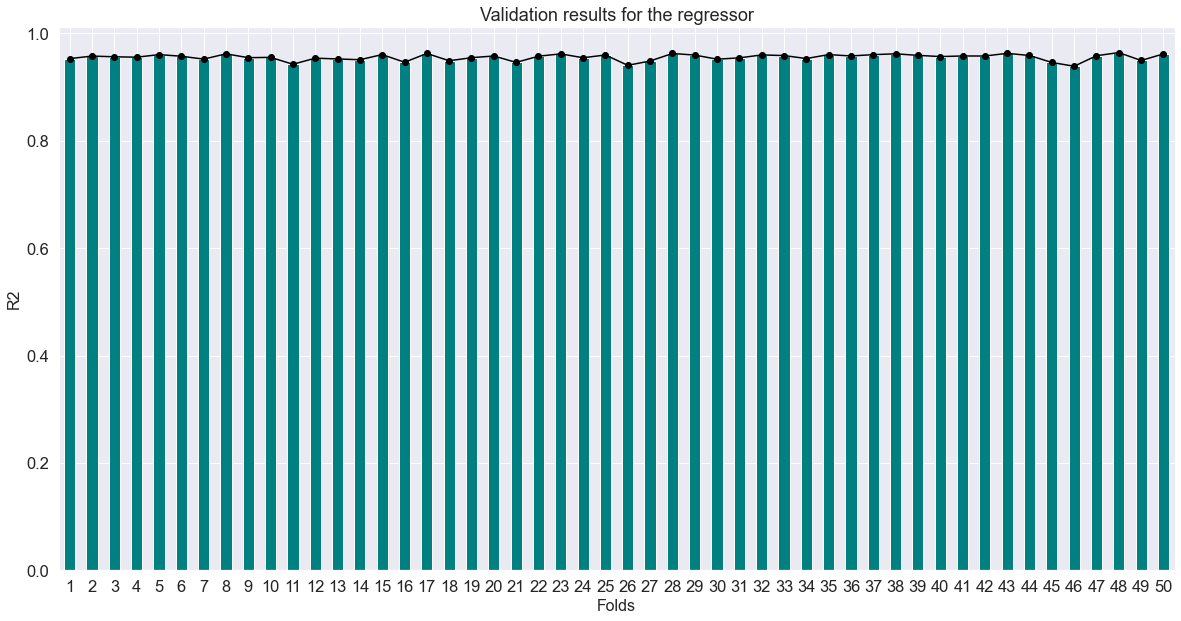

In [47]:
plt.figure(figsize = (20,10))
plt.plot(cross_validation,marker = 'o',color = 'black')
pd.Series(data = cross_validation).plot(kind = 'bar',color = 'teal')
plt.title(label  = 'Validation results for the regressor')
plt.xlabel(xlabel = 'Folds',fontsize = 16)
plt.ylabel(ylabel = 'R2', fontsize = 16)
plt.xticks(ticks = range(cross_validation.size),labels = range(1,cross_validation.size + 1),rotation = 0)
plt.show()

In [48]:
import pickle
with open('saved_model.pickle', 'wb') as pickled_file:
    pickle.dump(xgb_model, pickled_file)


In [49]:
predicted_data=pd.DataFrame(prediction ,columns=['Predicted'])

actual_data=pd.DataFrame(y_test)
actual_data=actual_data.rename(columns={'qiymet':'Actual_value'}).reset_index()['Actual_value']

compare_2_data=pd.concat([predicted_data,actual_data],axis=1)
compare_2_data.head(20)

,Predicted,Actual_value
0,8507.926758,9800.0
1,11209.909180,11800.0
2,108699.125000,120700.0
3,59373.996094,62050.0
4,43486.164062,45560.0
5,13496.833984,15800.0
6,29978.320312,29750.0
7,25782.755859,23600.0
8,74479.343750,71400.0
9,58404.515625,84830.0
